### Import Packages

In [ ]:
import pandas as pd

### Import dataset

In [ ]:
df = pd.read_csv(
  filepath_or_buffer='https://raw.githubusercontent.com/aaronmcdaid/P2---Data-Analytics-With-Python/master/Berlin/WS%202019/5.%20Datasets/titanic_dataset/train.csv',
)

In [ ]:
df.head(4)
# the n is for the amount of rows you want to see

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


## Introduction to statistics

Let's take a look at the data with `describe`. It will show you different values, but what do they mean?

In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Statistics and repeated events

First things first, **statistics** is a field that deals with the collection and analysis of data

A key assumption in classical statistics, is the fact that you can observe a certain event **repeatdely**

Examples:
- *Height*: you can go outside and you will see lots of people! You can observe the different heights, so this fulfills the assumption of repeated observations

- *World War*: in the last 5000 years there have only been two big world wars. This is **not** something we can observe repeatedly (and we don't want to repeat it!)

- *Seasonal flu*: every year during spring or fall, people usually get a flu. You might not get sick, or you might get sick more than once in a given year. But it is something you can observe repeatedly year after year

- *Coronavirus*: a new kind of virus that we have not seen before. It didn't even exist a year ago. This is **not** something we observe repeatedly

Why do we care about `count` from the `describe` function? Well, it tells us something about the size of the data set, and about missing values (more on that later in the course). Most importantly, it tells us something about whether we have **enough data** to do a good analysis




### Descriptive statistics

In statistics, we need **measures** to give us information about the data. In most cases, the data set is too large to even get any useful information by looking at it. 

Therefore, we need **location** and **dispersion** measures (fancy words for a very simple concept).

**Location measures** answer the question, what is a typical observation for a variable?

**Dispersion measures** tell us how much variation we have in our variable



#### Location Measures

**Min/Max**

Lowest and highest observed values 




In [ ]:
# For completeness, min and max
print(x.min())
print(x.max())

1
7


**Mean**

Add all the values up and then divide by the number of values

In [ ]:
# First: 1 + 3 + 3 + 4 + 7 = 10
# Second: 18 / 5 

x = pd.Series([1, 3, 3, 4, 7])
x.mean()

3.6

**Median**
Value separating the lower and the upper half of the variable (note that the values have to be sorted in ascendent order)

In [ ]:
x = pd.Series([1, 3, 3, 4, 7])
x.median()

3.0

In [ ]:
# If we change the order, the median does not change!
pd.Series([3, 7, 1, 4, 3]).median()

3.0

**Median vs. mean**

If we can always take the average, why should we ever use the median?
The median is **robust** against outliers. If you have a very extreme value in you data the mean will be affected very strongly by it. As the median is always the middle value, it is not affected by its extremes

In [ ]:
x = pd.Series([1, 3, 3, 4, 100])

# The mean gets very large!
x.mean()

22.2

In [ ]:
# The median is unchanged
x.median()

3.0

**Quantiles** 

Quantiles are related to the median. Remember how the median was the value that split our data in half? In other words 50% of observations are less than the median!

Are we limited to only 50%? No! 25% of all values are below the 25%-quantile. 75% of all values are below the 75%-quantile. This is what the `describe` method is showing to you

In [ ]:
x = pd.Series([1, 3, 3, 5, 6, 9, 10, 15])
# 25%-quantile
x.quantile(0.25)

3.0

In [ ]:
# 75%-quantile
x.quantile(0.75)

9.25

#### Dispersion measures

**Standard deviation (related to mean)**

To get an idea of how much variation we have in our data we can take the difference between our observation and the mean. We are not interested in the direction of the deviation (if our observation is above or below mean). We want to know how large the deviation is for a particular observation. The average over the deviations is our standard deviation

(*Mathematical Note:* This is a simplification of how it is actually [calculated](#https://en.wikipedia.org/wiki/Standard_deviation). Normally you square each deviation to eliminate negative values, then take the average of the squared deviations. This is the variance. At the end you have to take the square root of the variance to get the standard deviation. If you do not understand is, it is ok for now.)





In [ ]:
x = pd.Series([1, 3, 3, 5, 6, 9, 10, 15])
# 25%-quantile
x.mean()

6.5

In [ ]:
x.std()

4.59813626840888

**Interquantile range (related to quantiles)**

Another common way of checking how much variation we have in out data. The calculation is very simple – just take the difference between the 75%-quantile and the 25%-quantile. Since this is not based on the mean, it is more robust

In [ ]:
x = pd.Series([1, 3, 3, 5, 6, 9, 10, 15])
x.quantile(0.75) - x.quantile(0.25)

6.25

Pandas does not have a built-in IQR function. You can calculated it by hand as in the last example or take a look at `describe`, which gives you both the 75%- and the 25%-quantile

In [ ]:
x.describe()

count     8.000000
mean      6.500000
std       4.598136
min       1.000000
25%       3.000000
50%       5.500000
75%       9.250000
max      15.000000
dtype: float64

# Back to the data set
Question : What is the average age for male and female ?

In [ ]:
df[df.Sex == 'male'].Age.mean()

30.27273170731707

In [ ]:
df[df.Sex == 'female'].Age.mean()

30.27236220472441

# Excercises

## Excercise 1
Calculate the following statistics for the Titanic dataset over all passengers, for `Age` and `Fare`:

- Average value
- Median value (or 50th quantile)
- Standard Deviation
- IQR
- Range (max-min)


In [ ]:
df["Age"].mean()

30.272590361445783

In [ ]:
df["Age"].median()

27.0

In [ ]:
df["Age"].std()

14.18120923562442

In [ ]:
df["Age"].quantile(.75) - df["Age"].quantile(.25)

18.0

In [ ]:
df["Age"].max()

76.0

In [ ]:
df["Age"].min()

0.17

In [ ]:
df["Fare"].mean()

35.6271884892086

In [ ]:
df["Fare"].median()

14.4542

In [ ]:
df["Fare"].std()

55.90757617997383

In [ ]:
df["Fare"].quantile(.75) - df["Fare"].quantile(.25)

23.6042

In [ ]:
df["Fare"].max()

512.3292

In [ ]:
df["Fare"].min()

0.0

What can you conclude about these two metrics? Can you picture their distributions?


In [ ]:
df[['Age', 'Fare']].agg(
 ['min',
  'max',
  'median',
  'std'
 ]  
)

,Age,Fare
min,0.170000,0.000000
max,76.000000,512.329200
median,27.000000,14.454200
std,14.181209,55.907576


## Excercise 2
Use the `plot.hist` method to visualise the distribution of `Age` and `Fare`. Do you think the previously used aggregations gave you a good enough understanding of the distributions?


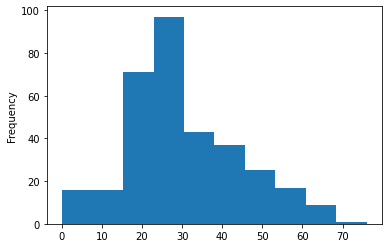

In [ ]:
df.Age.plot.hist()

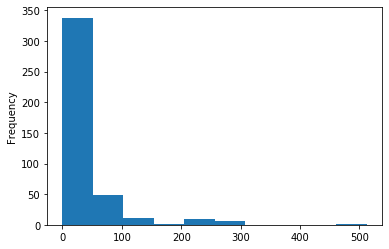

In [ ]:
df.Fare.plot.hist()

# Are statistics the only way we can aggregate data?
Statistics are a good example of aggregation functions, but by far not the only ones!

An aggregation is any function that takes in a set of elements and returns a single element. Some examples of aggregation functions that are pre-implemented by pandas:

- `.mean()` 
- `.median()`
- `.sum()` Sum over one entire axis
- `.prod()` Product of all elements over one entire axis
- `.count()` Count all **non null** items along one axis
- `.nunique()` Count unique items along one axis

They all behave very similarly, so we won't explore them too deeply.

## Aggregating a DataFrame

So far we have worked mostly with aggregating functions on a column (i.e. `Series`).

What do you think will happen if you call it on a DataFrame?

Try it out:

In [ ]:
df.sum()

PassengerId                                               460009
Pclass                                                       947
Name           Kelly, Mr. JamesWilkes, Mrs. James (Ellen Need...
Sex            malefemalemalemalefemalemalefemalemalefemalema...
Age                                                      10050.5
SibSp                                                        187
Parch                                                        164
Ticket         3309113632722402763151543101298753833097224873...
Fare                                                     14856.5
Embarked       QSQSSSQSCSSSSSSCQCSCCSSCCSCCSCSSSSCCSSSSCSSSSS...
dtype: object

When working with DataFrames, you will see that most functions expect an input `axis`.

This tells the function along which axis you want to work. For the case of aggregation, along which to run the aggregation.

Try the following:

In [ ]:
# We will create a fake dataframe to make things easier.

fake_data = pd.DataFrame(
    [
     [4,4,4,2,3,2,1,3,2],
     [4,4,4,2,3,2,1,3,2],
     [4,2,4,3,3,1,1,3,2],
     [4,2,4,3,3,1,1,3,2],
    ]
    )

fake_data.head()

,0,1,2,3,4,5,6,7,8
0,4,4,4,2,3,2,1,3,2
1,4,4,4,2,3,2,1,3,2
2,4,2,4,3,3,1,1,3,2
3,4,2,4,3,3,1,1,3,2


In [ ]:
fake_data.sum(axis=0)

0    16
1    12
2    16
3    10
4    12
5     6
6     4
7    12
8     8
dtype: int64

In [ ]:
fake_data.sum(axis=1)

0    25
1    25
2    23
3    23
dtype: int64

In [ ]:
fake_data.sum()

0    16
1    12
2    16
3    10
4    12
5     6
6     4
7    12
8     8
dtype: int64

## What if I need to use an aggregation function that is not defined in Pandas?

You'll find that this is a rare case, but if you need some strange statistic or a function that comes from another library, you have two options:

- Use the numpy or scipy libraries, they have plenty of specific functions
- Use the `agg` method with a self-defined function

### Using numpy functions with Pandas data

In [ ]:
# Numpy is an extremely powerful library for managing datasets in python, and it can easily interoperate with pandas

import numpy as np

np.mean(df.Age.values)

### Using agg

Agg can take any function or list of functions and run it on your series or dataframe.



In [ ]:
df.Age.agg('mean')

In [ ]:
df.Age.agg(['mean', 'median'])

In [ ]:
def my_agg_func(series):
  retunr series.sum()

df.Age.agg(series)